# Solving differential equations



## 1. Euler method

## 1.1 First order differential equation

We try to solve the following type of differential equation

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y)\\)

Since \\( \frac{\mathrm{d}y}{\mathrm{d}t} = \frac{y(t+h)-y(t)}{h}\\), we know that \\( y(t+h) = \frac{\mathrm{d}y}{\mathrm{d}t}h + y(t)\\).

Therefore, we can repetitively iterate the propagation: 

From the value \\( y_n \\) at step \\( n \\), corresponding to the time \\( t \\), we can calculate the value \\( y_{n+1} \\) at step \\( (n+1) \\), corresponding to the time \\( (t+h) \\):

\\( y_{n+1} = y_n + \frac{\mathrm{d}y}{\mathrm{d}t}h \\) which is 

\\( y_{n+1} = y_n + f(t,y_n) h \\)

### Example 1) Radioactive decay

\\( \dot{y} = -y\\) or

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -y\\)

Analytical solution: \\( y(t)=y_0 \exp(-t)\\)

In [6]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt 

In [27]:
#number of iterations 
nmax=200

#stepsize
h=0.01

#starting value
y=1

#collecting data
t_values=[0]
y_values=[y]

In [28]:
for i in range(1,nmax+1):
    f=-y
    y=y+f*h
    t_values.append(i*h)
    y_values.append(y)

In [29]:
y

0.13397967485796206

In [30]:
np.exp(-nmax*h)

0.1353352832366127

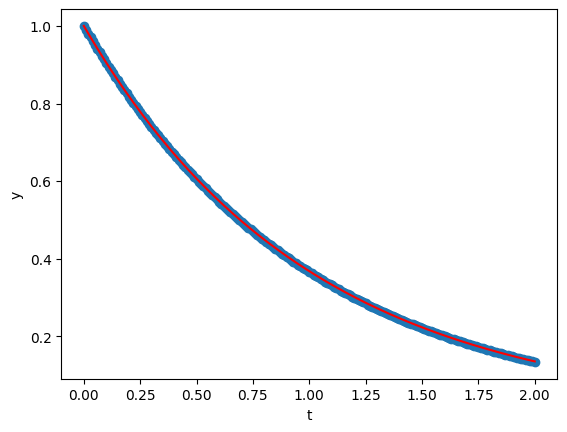

In [31]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = 1*np.exp(-test_t)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(t_values, y_values)

### Define a function "eulerODE"

In [32]:
def eulerODE(f,t0,y0,nmax,h):
    # f: Function
    # t0: Starting time
    # y0: Starting value of y
    # nmax: Number of iterations
    # h: Stepsize
    y = y0
    t = t0
    t_values = [t]
    y_values = [y]
    for i in range(1, nmax+1):
        y = y + f(t,y) * h
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array([t_values, y_values])

In [33]:
# Define function
def f_ODE(t,y):
    return -y

# Call Euler method
t0 = 0
y0 = 1
nmax = 200
h = 0.01
solution = eulerODE(f_ODE, t0, y0, nmax,h)

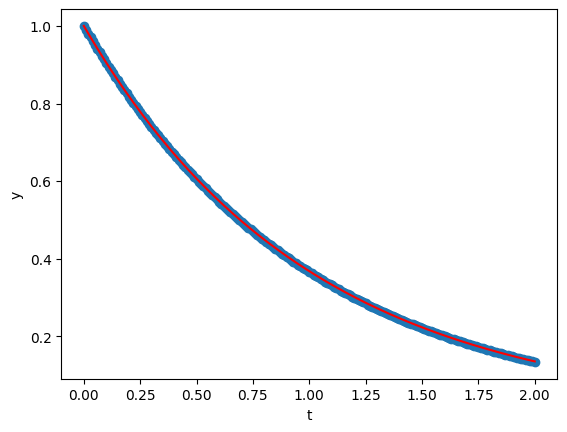

In [34]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = 1*np.exp(-test_t)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(solution[0], solution[1])

### Example 2) Time-amplified decay

\\( \dot{y} = -ayt\\) or

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -ayt\\)

Analytical solution: \\( y(t)=y_0 \exp(-t^2a/2)\\)

In [41]:
a=0.01
# Define function
def f_ODE(t,y):
    return -a*y*t

# Call Euler method
t0 = 0
y0 = 1
nmax = 300
h = 0.1
solution = eulerODE(f_ODE, t0, y0, nmax,h)

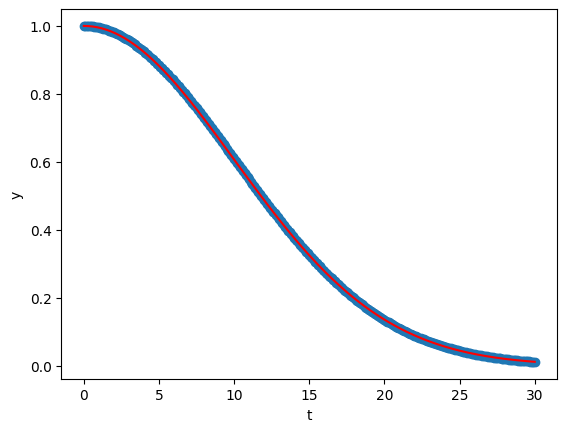

In [42]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2*a/2)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(solution[0], solution[1])

### 1.2 Higher-order differential equations

Example: Second-order differential equation: \\( y''(t) = f\left(t,y(t),y'(t)\right)\\)

Introduce: \\( z_0(t) = y(t)\\) and \\( z_1(t) = y'(t)\\)

\\( \begin{pmatrix}z_0'(t)\\z_1'(t)\end{pmatrix}=\begin{pmatrix}z_1(t)\\f\left(t,z_0(t),z_1(t)\right)\end{pmatrix}\\)

Therefore, we can describe the second-order differential equation by a set of two first-order differential equations. We can solve both with our Euler method

\\( z_0^{(n+1)} = z_0^{(n)} + z_1^{(n)} h \\)

\\( z_1^{(n+1)} = z_1^{(n)} + f\left(t,z_0^{(n)},z_1^{(n)}\right) h \\)

Or, going back to our initial nomenclature:

\\( y_{n+1} = y_{n} + y'_{n} h \\)

\\( y'_{n+1} = y'_{n} + f\left(t,y_{n},y'_{n}\right) h \\)

In [43]:
def eulerODE2(f,t0,y00,y10,nmax,h):
    # f: Function
    # t0: Starting time
    # y00: Starting value of y(t)
    # y10: Starting value of y'(t)
    # nmax: Number of iterations
    # h: Stepsize
    y0 = y00
    y1 = y10
    t = t0
    t_values = [t]
    y0_values = [y0]
    y1_values = [y1]
    for i in range(1, nmax+1):
        y0 = y0 + y1 * h
        y1 = y1 + f(t,y0,y1) * h
        t = t + h
        t_values.append(t)
        y0_values.append(y0)
        y1_values.append(y1)
    return np.array([t_values, y0_values, y1_values])

### Example 3) Free fall

\\( \ddot{y} = -g\\) or

\\( \frac{\mathrm{d}^2y}{\mathrm{d}t^2} = f(t,y,\dot{y}) = -g\\)

Analytical solution: \\( y(t)=-\frac{g}{2}t^2+v_0t+y_0\\)

In [46]:
g=9.81
def f_ODE(t,y0,y1):
    return -g

t0=0
y00=10
y10=50
nmax=100
h=0.1
solution=eulerODE2(f_ODE,t0,y00,y10,nmax,h)

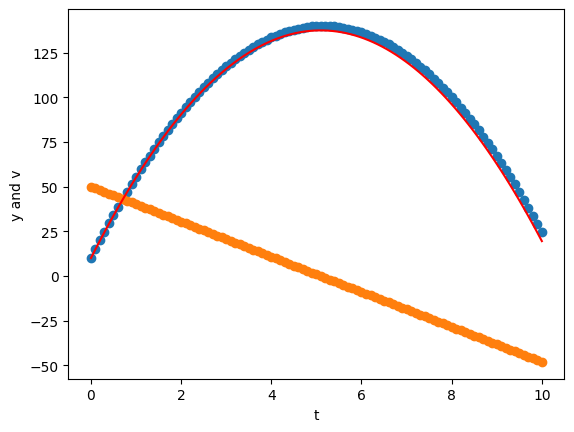

In [52]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = -g/2*test_t**2 + y10*test_t + y00
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y and v')
plt.scatter(solution[0], solution[1])
plt.scatter(solution[0], solution[2])

### Example 4) Harmonic oscillator

\\( \theta''(t) + b\theta'(t) + c\sin(\theta(t)) = 0 \\)

Here, \\( b \\) is the damping parameter and \\( c \\) is determined by the pendulum length \\( c = \frac{g}{l} \\).

### Small-angle approximation

For small angles \\( \theta\ll 1 \\) and without damping b = 0, we have 

\\( \theta''(t) = - \frac{g}{l}\theta(t) \\) with the solution (for \\( \theta'(0) = 0 \\))

\\( \theta(t) = \theta_0\cos\left(\sqrt{\frac{g}{l}}t\right) \\) and a period of \\( T = 2\pi\sqrt{\frac{l}{g}} \\)

In [53]:
# Pendulum geometry
length = 2
c = 9.81/length

# Damping
b = 0

def f_ODE(t,theta0,theta1):
    return -b*theta1 -c*theta0

t0 = 0
theta00 = 0.2
theta10 = 0
nmax = 200
h = 0.1

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

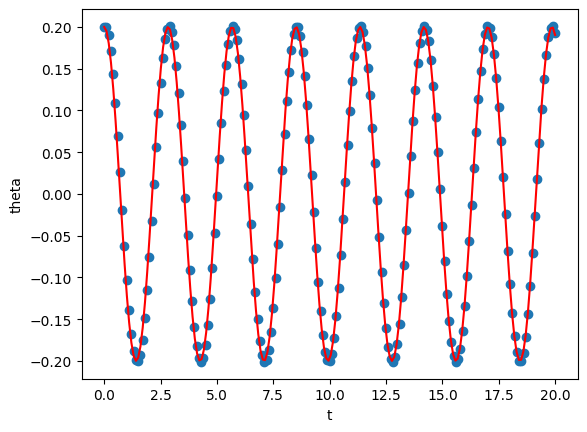

In [54]:
test_t = np.linspace(0, nmax*h, nmax)
test_theta = theta00*np.cos(np.sqrt(9.81/length)*test_t)
plt.plot(test_t, test_theta, 'red')

plt.xlabel('t')
plt.ylabel('theta')
plt.scatter(solution[0], solution[1])